In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
teams = pd.read_csv('teams.csv')

import warnings
warnings.filterwarnings("ignore")

teams

team  year  athletes  events   age  height  weight  prev_medals  medals
0     AFG  1964         8       8  22.0   161.0    64.2            0       0
1     AFG  1968         5       5  23.2   170.2    70.0            0       0
2     AFG  1972         8       8  29.0   168.3    63.8            0       0
3     AFG  1980        11      11  23.6   168.4    63.2            0       0
4     AFG  2004         5       5  18.6   170.8    64.8            0       0
...   ...   ...       ...     ...   ...     ...     ...          ...     ...
2009  ZIM  2000        26      19  25.0   179.0    71.1            0       0
2010  ZIM  2004        14      11  25.1   177.8    70.5            0       3
2011  ZIM  2008        16      15  26.1   171.9    63.7            3       4
2012  ZIM  2012         9       8  27.3   174.4    65.2            4       0
2013  ZIM  2016        31      13  27.5   167.8    62.2            0       0

[2014 rows x 9 columns]

In [2]:
print(teams.dtypes)

team            object
year             int64
athletes         int64
events           int64
age            float64
height         float64
weight         float64
prev_medals      int64
medals           int64
dtype: object


In [3]:
teams.isnull().sum()

team           0
year           0
athletes       0
events         0
age            0
height         0
weight         0
prev_medals    0
medals         0
dtype: int64

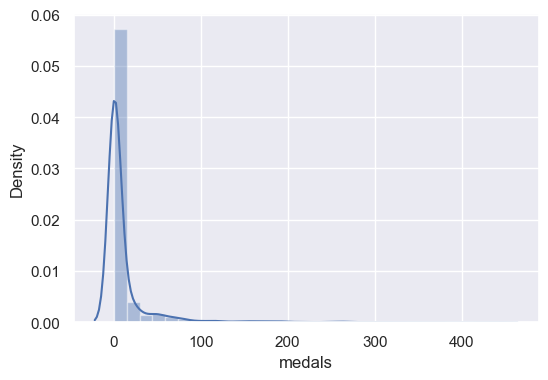

In [4]:
import seaborn as sns 
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(teams['medals'], bins=30)
plt.show()

In [5]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
teams['team'] = label_encoder.fit_transform(teams['team'])
teams.head(10)

team  year  athletes  events   age  height  weight  prev_medals  medals
0     0  1964         8       8  22.0   161.0    64.2            0       0
1     0  1968         5       5  23.2   170.2    70.0            0       0
2     0  1972         8       8  29.0   168.3    63.8            0       0
3     0  1980        11      11  23.6   168.4    63.2            0       0
4     0  2004         5       5  18.6   170.8    64.8            0       0
5     0  2008         4       4  22.5   179.2    62.8            0       1
6     0  2012         6       6  24.8   171.7    60.8            1       1
7     0  2016         3       3  24.7   173.7    74.0            1       0
8     1  1964         4       4  28.5   171.2    69.4            0       0
9     1  1968         5       4  31.0   173.2    67.8            0       0

In [6]:
X = teams[["athletes", "age", "weight", "prev_medals"]].copy()
y = teams[["medals"]].copy()

In [7]:
X

athletes   age  weight  prev_medals
0            8  22.0    64.2            0
1            5  23.2    70.0            0
2            8  29.0    63.8            0
3           11  23.6    63.2            0
4            5  18.6    64.8            0
...        ...   ...     ...          ...
2009        26  25.0    71.1            0
2010        14  25.1    70.5            0
2011        16  26.1    63.7            3
2012         9  27.3    65.2            4
2013        31  27.5    62.2            0

[2014 rows x 4 columns]

In [8]:
y

medals
0          0
1          0
2          0
3          0
4          0
...      ...
2009       0
2010       3
2011       4
2012       0
2013       0

[2014 rows x 1 columns]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test =  train_test_split(X, y, test_size = 0.3)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1409, 4)
(605, 4)
(1409, 1)
(605, 1)


### Linear Regression:

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score

In [12]:
Y_test_predict = lin_model.predict(X_test)

rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

RMSE is 13.839275334931079
R2 score is 0.8677379907508646


### Ridge Regression:

In [13]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, Y_train)

pred_train_rr= rr.predict(X_train)
print('RMSE of Training data:',np.sqrt(mean_squared_error(Y_train,pred_train_rr)))
print('R2 of Training data:',r2_score(Y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print('RMSE of Test data:',np.sqrt(mean_squared_error(Y_test,pred_test_rr))) 
print('R2 of Test data:',r2_score(Y_test, pred_test_rr))

RMSE of Training data: 11.288021163399485
R2 of Training data: 0.8717180059150325
RMSE of Test data: 13.839275443488587
R2 of Test data: 0.8677379886758955


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
X = teams.iloc[:,0:6]
Y = teams['medals']

ridge_model = Ridge(alpha=0.5)

cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=1)

scores = cross_val_score(ridge_model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 7.588 (0.979)


### Lasso Regression:

In [15]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)

cv = RepeatedKFold(n_splits=10, n_repeats=6, random_state=1)

scores = cross_val_score(lasso_model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 7.521 (0.983)


In [16]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))
print(r2_score(Y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,pred_test_lasso))) 
print(r2_score(Y_test, pred_test_lasso))

11.288021775053314
0.8717179920128305
13.839593561655004
0.867731908092807
